In [1]:
import torch

In [2]:
model = torch.load('model.pt')

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [ ]:
del model.fc

In [ ]:
model(torch.zeros(32, 3, 300, 300))

tensor([[0.1551, 0.0008, 0.0776,  ..., 0.5130, 0.0092, 0.0021],
        [0.1551, 0.0008, 0.0776,  ..., 0.5130, 0.0092, 0.0021],
        [0.1551, 0.0008, 0.0776,  ..., 0.5130, 0.0092, 0.0021],
        ...,
        [0.1551, 0.0008, 0.0776,  ..., 0.5130, 0.0092, 0.0021],
        [0.1551, 0.0008, 0.0776,  ..., 0.5130, 0.0092, 0.0021],
        [0.1551, 0.0008, 0.0776,  ..., 0.5130, 0.0092, 0.0021]],
       grad_fn=<ViewBackward0>)

In [ ]:
import torchvision
import os
class Dataset:
    def __init__(self, paths):
        self.paths = paths

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, ind):

        return torchvision.transforms.Resize((256,256))(torchvision.io.read_image(self.paths[ind]) / 255)
dataset = Dataset(list(map(lambda x: f'img_data/train/images/{x}', os.listdir('img-data/train/images'))))

dataloader = torch.utils.data.DataLoader(dataset, shuffle=False, batch_size=4)

In [ ]:
from tqdm import tqdm

In [ ]:
count = 100
embeds = []
device = 'cuda'
with torch.no_grad():
    model.to(device)
    for images in tqdm(dataloader):
        images = images.to(device)

        epoch_embeds = model(images).cpu()

        embeds.append(epoch_embeds)
        count += 1
        if count == 100:
            break

  0%|                                                  | 0/2044 [00:00<?, ?it/s]/Users/len/anaconda3/envs/py_projects/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
100%|███████████████████████████████████████| 2044/2044 [00:59<00:00, 34.08it/s]


In [ ]:
embeds = torch.concat(embeds, dim=0)

In [ ]:
mean_embed = embeds.mean(dim = 0)

In [ ]:
cos_sims = []

for i in range(embeds.shape[0]):
    cos_sims.append(torch.nn.CosineSimilarity(dim=0)(mean_embed, embeds[i]).item())

In [ ]:
cos_sims = torch.tensor(cos_sims)

In [ ]:
dataset[torch.topk(cos_sims * (-1), k=10).indices[0]]

tensor([[[0.6549, 0.6549, 0.6549,  ..., 0.6941, 0.6941, 0.6941],
         [0.6588, 0.6588, 0.6588,  ..., 0.6902, 0.6902, 0.6902],
         [0.6627, 0.6627, 0.6627,  ..., 0.6863, 0.6863, 0.6863],
         ...,
         [0.6402, 0.6500, 0.6449,  ..., 0.6493, 0.6275, 0.6267],
         [0.6529, 0.6446, 0.6414,  ..., 0.6696, 0.6561, 0.6630],
         [0.6664, 0.6419, 0.6419,  ..., 0.6775, 0.6716, 0.6853]],

        [[0.7843, 0.7843, 0.7843,  ..., 0.8314, 0.8314, 0.8314],
         [0.7882, 0.7882, 0.7882,  ..., 0.8275, 0.8275, 0.8275],
         [0.7922, 0.7922, 0.7922,  ..., 0.8235, 0.8235, 0.8235],
         ...,
         [0.6559, 0.6657, 0.6605,  ..., 0.6571, 0.6353, 0.6346],
         [0.6686, 0.6603, 0.6571,  ..., 0.6775, 0.6640, 0.6708],
         [0.6821, 0.6576, 0.6576,  ..., 0.6853, 0.6794, 0.6931]],

        [[0.9059, 0.9059, 0.9059,  ..., 0.9412, 0.9412, 0.9412],
         [0.9098, 0.9098, 0.9098,  ..., 0.9392, 0.9392, 0.9392],
         [0.9137, 0.9137, 0.9137,  ..., 0.9412, 0.9412, 0.

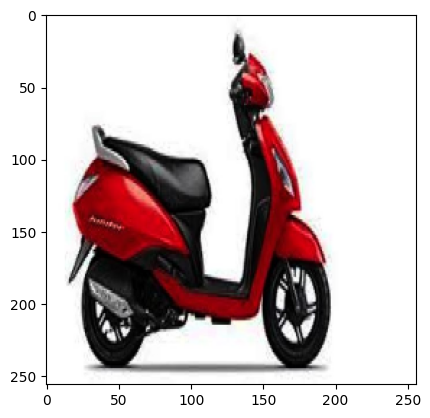

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(dataset[torch.topk(cos_sims * (-1), k=10).indices[9]].permute(1,2,0))